In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Dataset

In [9]:
def load_data(battery):
  mat = loadmat('' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [5]:
dataset.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


Text(0.5, 1.0, 'Discharge B0005')

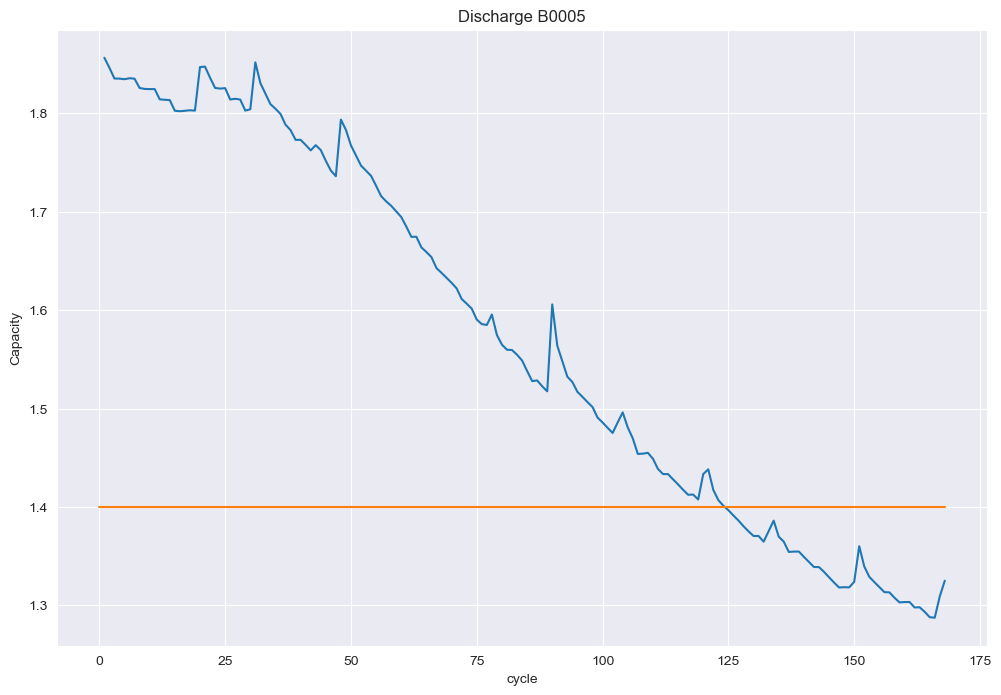

In [6]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

Text(0.5, 1.0, 'Discharge B0005')

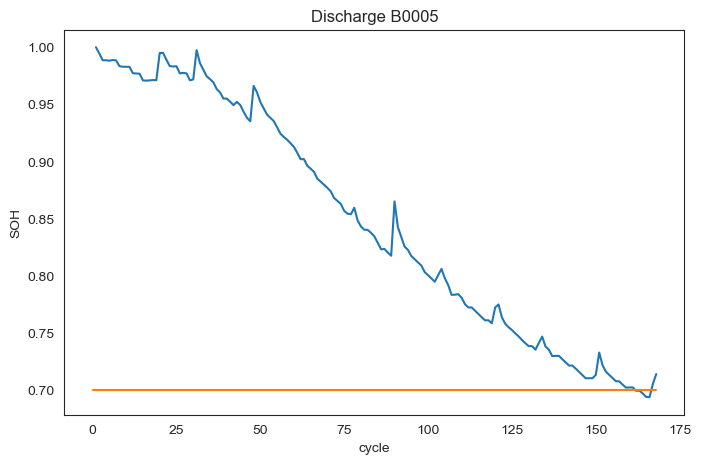

In [8]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [96]:
cycle_array= np.array(dataset['cycle'])

In [31]:
dataset['RUL'] = 168-cycle_array

In [33]:
dataset

,cycle,ambient_temperature,datetime,capacity,voltage_measured,...,current_load,voltage_load,time,SoH,RUL
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,...,-0.0006,0.000,0.000,1.000000,167
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,...,-0.0006,4.206,16.781,0.994527,167
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,...,-1.9982,3.062,35.703,0.988614,167
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,...,-1.9982,3.030,53.781,0.988567,167
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,...,-1.9982,3.011,71.922,0.988235,167
...,...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,...,0.0006,0.000,2781.312,NaN,0
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,...,0.0006,0.000,2791.062,NaN,0
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,...,0.0006,0.000,2800.828,NaN,0
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,...,0.0006,0.000,2810.640,NaN,0


In [34]:
df = dataset

In [40]:
df = df.drop(columns = ['SoH'])

## Explodatory Data Analysis

In [41]:
df.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,...,temperature_measured,current_load,voltage_load,time,RUL
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,...,24.330034,-0.0006,0.000,0.000,167
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,...,24.325993,-0.0006,4.206,16.781,167
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,...,24.389085,-1.9982,3.062,35.703,167
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,...,24.544752,-1.9982,3.030,53.781,167
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,...,24.731385,-1.9982,3.011,71.922,167


In [42]:
df.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,RUL
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924,79.874058
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295,45.699687
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000,41.000000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000,80.000000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000,118.000000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000,167.000000


<AxesSubplot:>

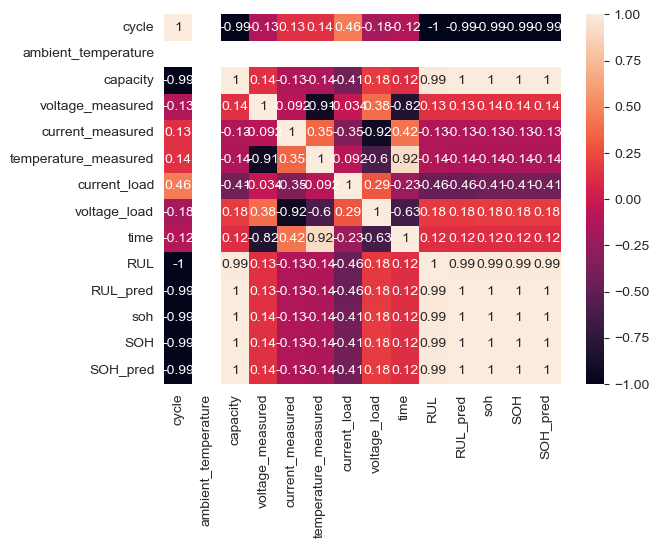

In [89]:
sns.heatmap(df.corr(), annot = True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 50285 non-null  int64         
 1   ambient_temperature   50285 non-null  int32         
 2   datetime              50285 non-null  datetime64[ns]
 3   capacity              50285 non-null  float64       
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_load          50285 non-null  float64       
 8   voltage_load          50285 non-null  float64       
 9   time                  50285 non-null  float64       
 10  RUL                   50285 non-null  int64         
 11  SOH                   50285 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int32(1), int64(2)
memory usage: 4.4 MB


In [20]:
dataset.isna().sum()

cycle                       0
ambient_temperature         0
datetime                    0
capacity                    0
voltage_measured            0
current_measured            0
temperature_measured        0
current_load                0
voltage_load                0
time                        0
SoH                     50117
dtype: int64

# Machine learning Implementation

<p> Here we are implementing multiple machine learning techniques for example Linear Regression, Decision Tree, Random Forest also some esembling techniques like Bagging with RF, Boosting with GB. At the end we will compare all the ml technique accuray. It will be helpfull fo rus to know which ml techinque is working properly </p>

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df is your DataFrame
features = ['cycle', 'ambient_temperature', 'voltage_measured', 'current_measured', 'temperature_measured', 'current_load', 'voltage_load', 'time']
target = 'SOH'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, y_test, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

evaluate_model(linear_predictions, y_test, 'Linear Regression')
evaluate_model(dt_predictions, y_test, 'Decision Tree Regressor')
evaluate_model(rf_predictions, y_test, 'Random Forest Regressor')


Linear Regression - Mean Squared Error: 0.0002239971272592741, R-squared: 0.9768123399683541
Decision Tree Regressor - Mean Squared Error: 5.793947345542318e-30, R-squared: 1.0
Random Forest Regressor - Mean Squared Error: 1.2263587861112884e-09, R-squared: 0.9999998730501996


## Ensemble techniques 

In [85]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your DataFrame
features = ['cycle', 'ambient_temperature', 'voltage_measured', 'current_measured', 'temperature_measured', 'current_load', 'voltage_load', 'time']
target = 'SOH'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging with Random Forest
bagging_model = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

# Boosting with Gradient Boosting
boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, y_test, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

evaluate_model(bagging_predictions, y_test, 'Bagging with Random Forest')
evaluate_model(boosting_predictions, y_test, 'Boosting with Gradient Boosting')


Bagging with Random Forest - Mean Squared Error: 1.076830712151592e-11, R-squared: 0.99999999888529
Boosting with Gradient Boosting - Mean Squared Error: 3.0152836389704887e-06, R-squared: 0.9996878648723093


## Visualize the predicted values against the actual values

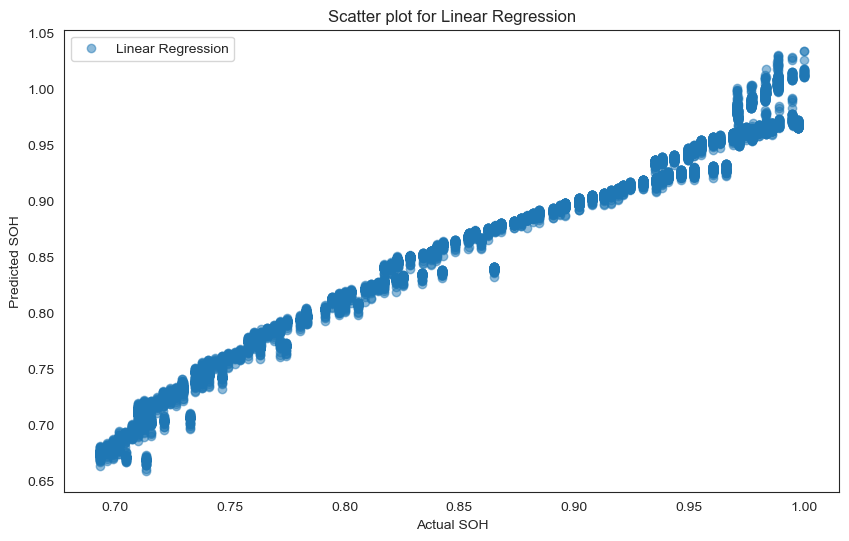

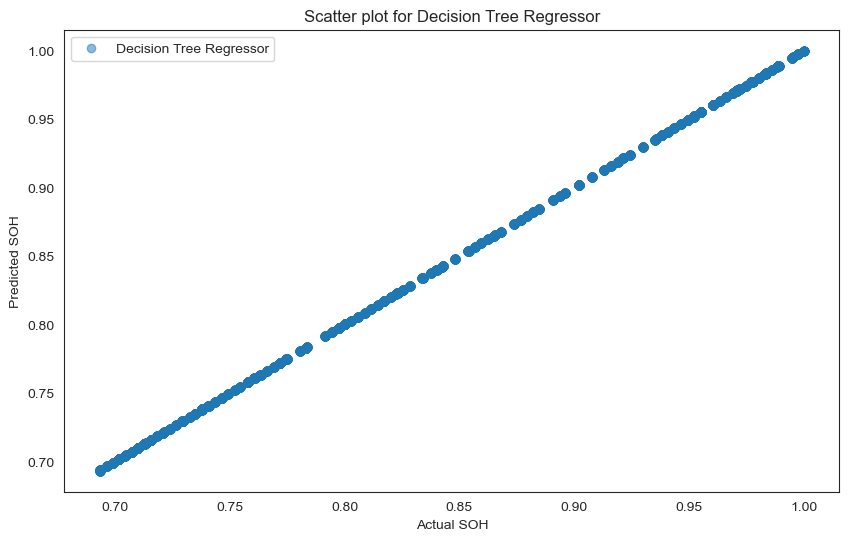

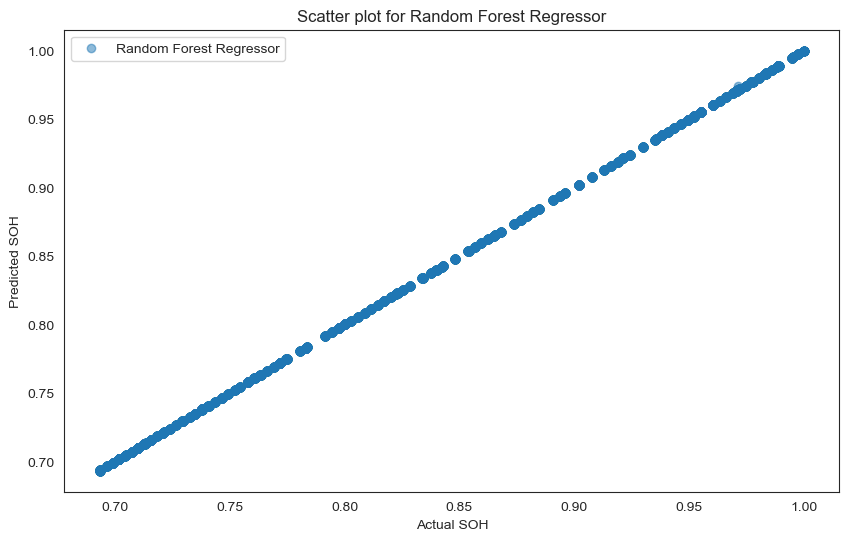

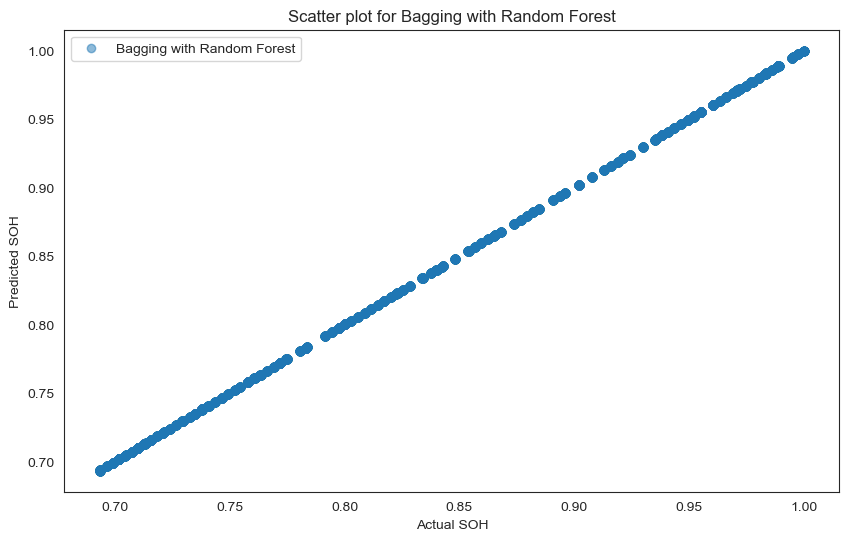

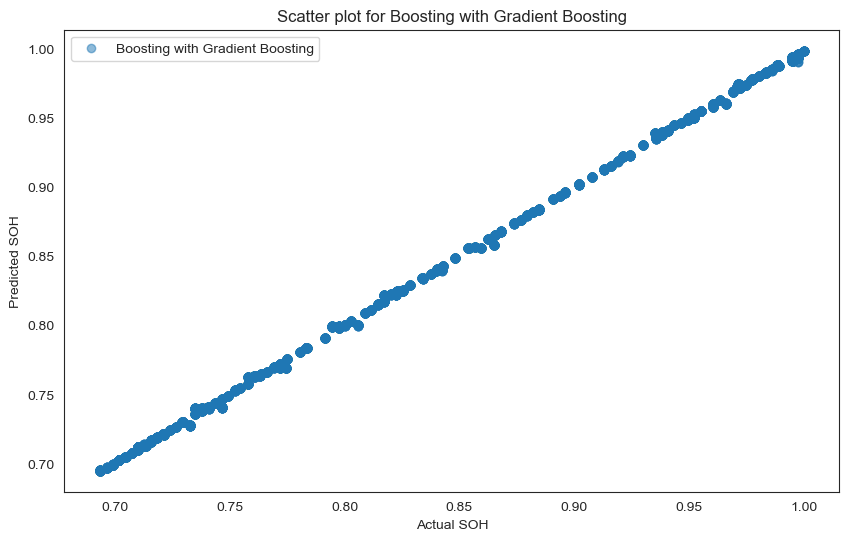

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, label='Linear Regression', alpha=0.5)
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter plot for Linear Regression')
plt.legend()
plt.show()

# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, label='Decision Tree Regressor', alpha=0.5)
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter plot for Decision Tree Regressor')
plt.legend()
plt.show()

# Scatter plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor', alpha=0.5)
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter plot for Random Forest Regressor')
plt.legend()
plt.show()

# Scatter plot for Bagging with Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, bagging_predictions, label='Bagging with Random Forest', alpha=0.5)
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter plot for Bagging with Random Forest')
plt.legend()
plt.show()

# Scatter plot for Boosting with Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, boosting_predictions, label='Boosting with Gradient Boosting', alpha=0.5)
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter plot for Boosting with Gradient Boosting')
plt.legend()
plt.show()

## Comparing the accuracy of different models


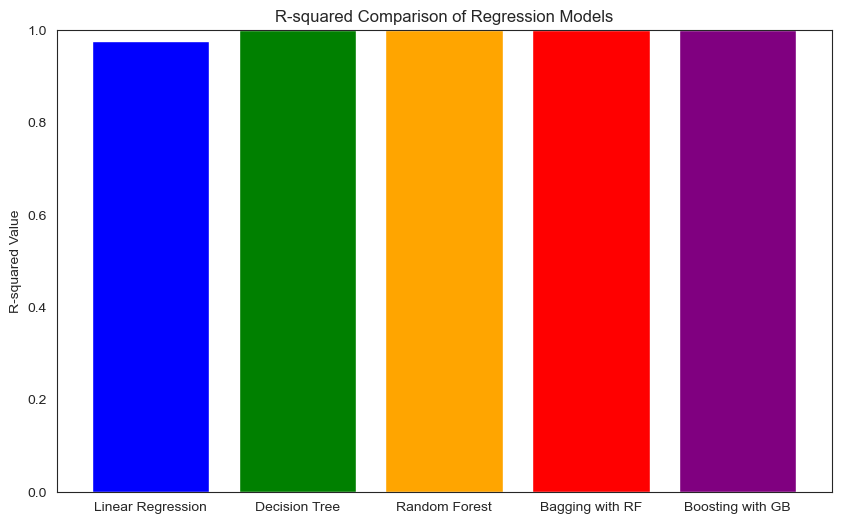

In [88]:
import matplotlib.pyplot as plt

# R-squared values for each model
r_squared_values = [linear_model.score(X_test, y_test),
                    dt_model.score(X_test, y_test),
                    rf_model.score(X_test, y_test),
                    bagging_model.score(X_test, y_test),
                    boosting_model.score(X_test, y_test)]

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Bagging with RF', 'Boosting with GB']

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('R-squared Value')
plt.title('R-squared Comparison of Regression Models')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()


<p> Here We can see that Decision Tree, Random Forest, Bagging with RF, Boosting with GB all these are giving around 100% accuracy. So we can use them to predict State of Health(SOH) of the battery </p>